# Análise Exploratória de Dados

Análise Exploratória de Dados, também referida pelo acrônimo EDA, do inglês *Exploratory Data Analysis*, é uma das ferramentas mais importantes da Ciência de Dados. Mesmo com todo o alarde em cima de *Machine Learning* e Inteligência Artificial, a Análise Exploratória de Dados permanece fundamental para entender a natureza dos dados e os tipos de variáveis a serem analizados. Muitas vezes, uma EDA bem feita, além de levantar questões importantes que serão modeladas pelo time de ML, também podem fornecer insights imediatos e assertivos sobre o seu *business case*.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def basics(df):
    print("=============")
    print("Dataset sample:")
    print(df.head(5))
    print("-------------")
    print("Lines, Columns:")
    print(df.shape)
    print("-------------")
    print("Info:")
    print(df.info())
    print("-------------")
    print("Summary statistics:")
    print(df.describe())
    print("=============")

## Descrição do conjunto de dados

### Cursos


**code_module:** Código do curso

**code_presentation:** Semestre em que o curso é ministrado

**module_presentation_length:** Duração do módulo no semestre. Provavelmente em horas.

In [3]:
courses = pd.read_csv('input/courses.csv')
basics(courses)

Dataset sample:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
-------------
Lines, Columns:
(22, 3)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None
-------------
Summary statistics:
       module_presentation_length
count                   22.000000
mean                  

### Provas

**code_module, code_presentation:** mesmos do dataset courses.

**id_assessment:** Identificação da prova. Chave primária. 

**assessment_type:** Tipo de prova.

**date:** Data da prova (dias depois do começo do curso). O fato de existirem diferentes datas para as provas pode significar que elas são assíncronas; ou seja, não são tomadas ao mesmo tempo. Essa é uma característica comum de ensinos online, que pode ser o nosso caso aqui.

**peso:** Peso da prova na nota final.

In [4]:
assessments = pd.read_csv('input/assessments.csv')
basics(assessments)

Dataset sample:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
-------------
Lines, Columns:
(206, 6)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight      

### VLE

VLE significa *Virtual Learning Environment*. Traduzindo, Ambiente de Aprendizado Virtual. 

Isso confirma nossa hipótese de que este banco de dados consiste em um modelo de ensino online.

**id_site:** Identificação da página web. Primary keys.

**code_module, code_presentation:** Mesmos do dataset couses. Foreign keys.

**activity_type:** tipo de atividade executado na página web.

**week_from, week_to:** Datas de começo e fim das atividades identificadas.

In [5]:
vle = pd.read_csv('input/vle.csv')
basics(vle)

Dataset sample:
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN
-------------
Lines, Columns:
(6364, 6)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non

### Relação entre estudantes e provas

**id_assessment:** Relacionado ao dataset assessment.

**id_student:** Relacionado ao dataset studentInfo

**date_submitted:** Data de submissão do teste.

**is_banked:** Se o estudante recebe bolsa ou não. Variável categórica.

**score:** Nota no teste.



In [6]:
studentAssessment = pd.read_csv('input/studentAssessment.csv')
basics(studentAssessment)

Dataset sample:
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
-------------
Lines, Columns:
(173912, 5)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
-------------
Summary statistics:
       id_assessment   

### Estudantes

Informações individuais dos estudantes 

**code_module, code_presentation:** Referências ao dataset courses.

**id_student:** Identificação da estudante. Não é uma chave primária, já que estudantes podem ser registradas mais de uma vez no mesmo curso, caso reprovados.

**gender:** Gênero da estudante. Variável categórica.

**region:** Regiões em que a estudante está localizada. Aparentemente, nosso sistema de ensino é voltado a estudantes do Reino Unido. Irlanda pode se referir à Irlanda do Norte, parte do Reino Unido. Esta variável pode ser interpretada como categórica.

**highest_education:** Nível de formação mais alto alcançado pelo estudante. Variável categórica.

**imd_band:** Índice de Deprivação Múltipla, do inglês *Index of Multiple Deprivation*. É um índice amplamente para medir a pobreza de pequenas áreas do Reino Unido. Múltiplos de deprivação são medidos, pesados e agregados na formação deste índice composto. https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015

**age_band:** Faixa etária. Variável categórica.

**num_of_prev_attempts:** Número de tentativas anteriores em que estudante realizou o teste. Variável categórica.

**studied_credits:** Créditos ganhos.

**disability:** Deficiência. Variável categórica/boolean.

**final_result:** Resultado Final. Variável categórica.

In [7]:
studentInfo = pd.read_csv('input/studentInfo.csv')
basics(studentInfo)

Dataset sample:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          

O conjunto de dados registra todas as tentativas de estudantes passarem nas provas. Para considerarmos cada estudante individualmente, nós limpamos as ocorrências duplicadas do mesmo estudante. Assim, `id_student` de `studentProfile` se torna uma chave primária.

In [8]:
studentProfile = studentInfo[['id_student', 'gender', 'region', 'highest_education', 
                              'imd_band', 'age_band', 'disability']].drop_duplicates()
studentProfile.shape

(28857, 7)

### Registro de estudantes

**code_module, code_presentation:** Referente ao dataset courses.

**id_student:** Referente ao dataset studentInfo e studentAssessment.

**date_registration:** Data de registro no curso. É difícil entender a métrica utilizada aqui para balizar o centro (zero) da distribuição, mas é provável que o valor numérica esteja quantitativizado em dias.

**date_unregistration:** Data de fechamento do curso. Valores nulos (NaN) significam que estudantes estiveram registrados do início ao fim do curso.

In [9]:
studentRegistration = pd.read_csv('input/studentRegistration.csv')
basics(studentRegistration)

Dataset sample:
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
-------------
Lines, Columns:
(32593, 5)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registra

### Estudantes no VLE

Dados dos estudantes nos sites. 

**code_module, code_presentation** Referência ao dataset courses.

**id_student:** Referência ao dataset studentProfile.

**id_site:** Referência ao dataset VLE.

**date:** Data do registro. 

**sum_click:** Soma de cliques de certo estudante em uma determinada página web do VLE.

In [10]:
studentVle = pd.read_csv('input/studentVle.csv')
basics(studentVle)

Dataset sample:
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1
-------------
Lines, Columns:
(10655280, 6)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None
-------------
Summary statistics:
         id_student       id_site          date

## Gênero

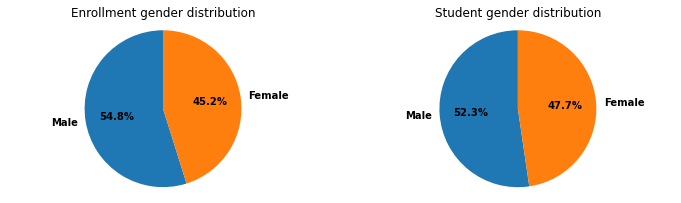

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

axes[0].pie(studentInfo["gender"].value_counts().tolist(),
        labels=["Male", "Female"], 
        startangle=90, 
        autopct='%.1f%%', 
        textprops={'weight': 'bold'})

axes[1].pie(studentProfile["gender"].value_counts().tolist(),
        labels=["Male", "Female"], 
        startangle=90, 
        autopct='%.1f%%', 
        textprops={'weight': 'bold'})

axes[0].set_title('Enrollment gender distribution')
axes[0].axis('equal')
axes[1].set_title('Student gender distribution')
axes[1].axis('equal');

## Deficiência

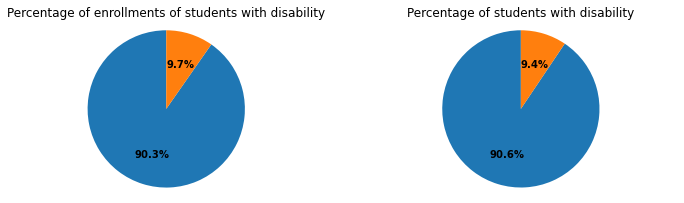

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

axes[0].pie(studentInfo["disability"].value_counts().tolist(),
        startangle=90, 
        autopct='%.1f%%', 
        textprops={'weight': 'bold'})

axes[1].pie(studentProfile["disability"].value_counts().tolist(), 
        startangle=90, 
        autopct='%.1f%%', 
        textprops={'weight': 'bold'})

axes[0].set_title("Percentage of enrollments of students with disability")
axes[0].axis('equal')
axes[1].set_title("Percentage of students with disability")
axes[1].axis('equal');

## Região

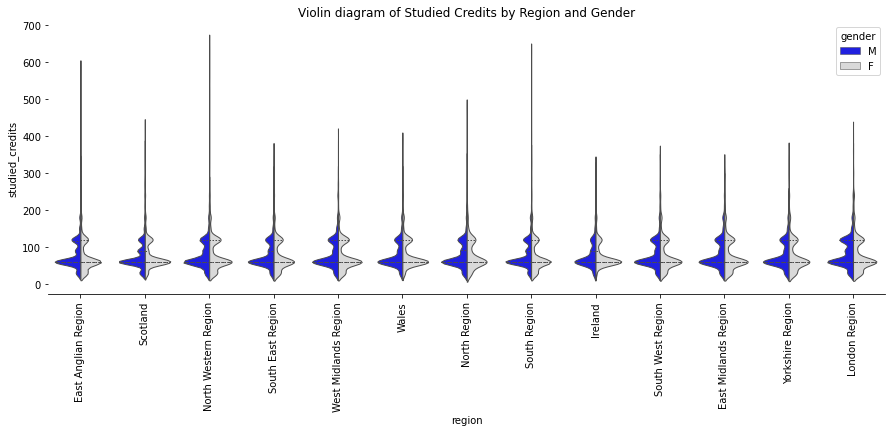

In [13]:
# Draw a nested violinplot and split the violins for easier comparison
plt.subplots(figsize=(15, 5))
sns.violinplot(data=studentInfo, x="region", y="studied_credits", hue="gender",
               split=True, inner="quart", linewidth=1,
               palette={"M": "b", "F": ".85"})
sns.despine(left=True)
plt.xticks(rotation = 90)
plt.title("Violin diagram of Studied Credits by Region and Gender");

Diagramas estilo "violino" são melhores para visualizar múltiplos picos na distribuição dos dados. Por exemplo, no diagrama acima, nós vemos dois ao menos dois picos para os membros de ambos os gêneros: um pico maior e um pico menor. Isso pode indicar que existem dois tipos diferentes de distribuição das inscrições. Como veremos logo, estes picos indicam os períodos de inscrições na primavera e outono (os dois semestres de aula do Hemisfério Norte). Além disso, também podemos reparar uma assimetria de gêneros. Ao compararmos o padrão azul (masculino) e cinza (feminino), observamos que a amplitude da distribuição do gênero feminino é mais ampla do que a do gênero masculino. 

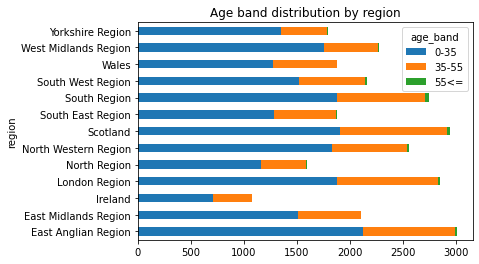

In [14]:
pd.crosstab(studentProfile.region, studentProfile.age_band).plot.barh(stacked = True)
plt.title("Age band distribution by region");

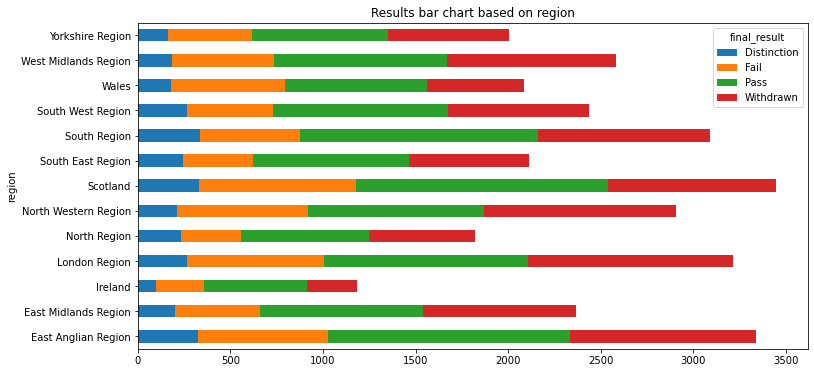

In [15]:
studentInfo.groupby(['region',
                     'final_result']).size().unstack().plot(kind='barh',
                                                            stacked=True,
                                                            title='Results bar chart based on region',
                                                            figsize=(12,6));

## Performance

In [16]:
studentPerformance = studentInfo[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

In [17]:
studentPerformance.head()

,num_of_prev_attempts,studied_credits
id_student,,
3733,0.0,60.0
6516,0.0,60.0
8462,0.5,75.0
11391,0.0,240.0
23629,2.0,60.0


In [18]:
studentPerformance = studentPerformance.reset_index()

In [19]:
studentPerformance.head()

,id_student,num_of_prev_attempts,studied_credits
0,3733,0.0,60.0
1,6516,0.0,60.0
2,8462,0.5,75.0
3,11391,0.0,240.0
4,23629,2.0,60.0


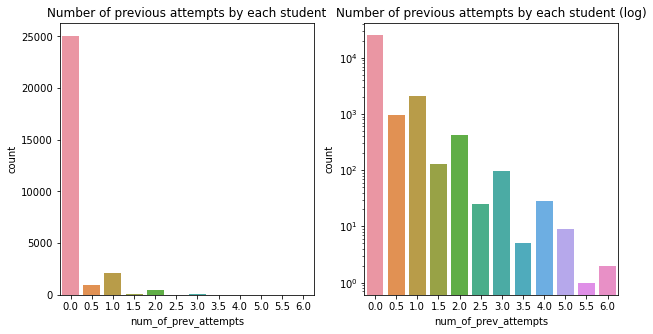

In [20]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(studentPerformance['num_of_prev_attempts'], ax=ax[0])
sns.countplot(studentPerformance['num_of_prev_attempts'], ax=ax[1]).set_yscale("log")
ax[0].set_title('Number of previous attempts by each student')
ax[1].set_title('Number of previous attempts by each student (log)');

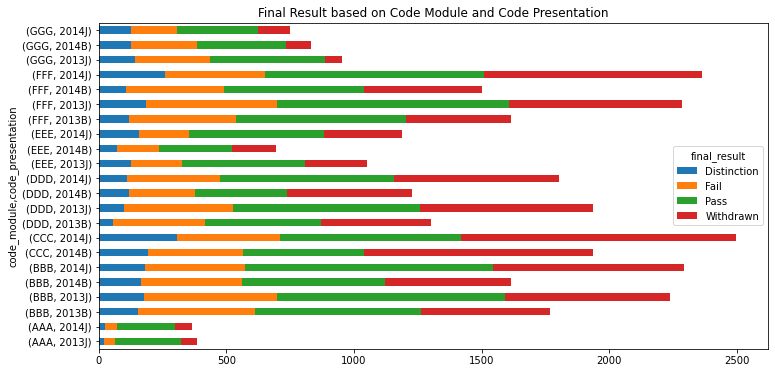

In [21]:
studentInfo.groupby(['code_module',
                     'code_presentation',
                     'final_result']).size().unstack().plot(kind='barh', 
                                                            stacked=True, 
                                                            title='Final Result based on Code Module and Code Presentation',
                                                            figsize=(12,6));

- 'B' é para cursos oferecidos em Fevereiro e 'J' para cursos oferecidos em Outubro. 
- Curso CCC foi introduzido apenas em 2014.
- Curso AAA possui uma contagem bem mais baixa de estudantes quando comparado com outros cursos. 

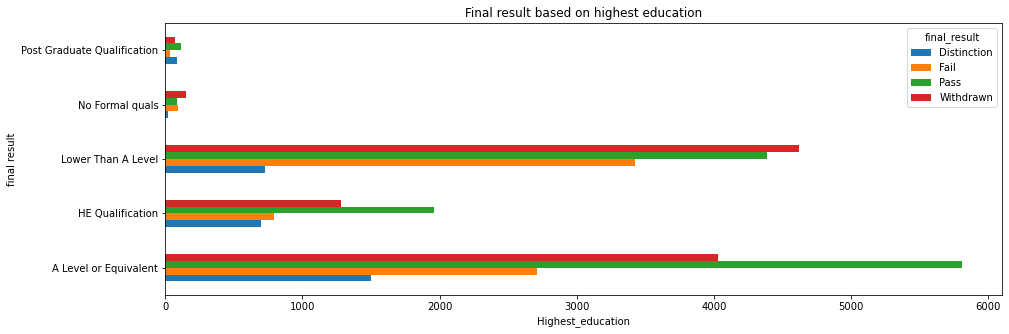

In [22]:
studentInfo.groupby(['highest_education','final_result']).size().unstack().plot(kind='barh',figsize=(15,5))
plt.xlabel('Highest_education')
plt.ylabel('final result')
plt.title('Final result based on highest education')
plt.show();

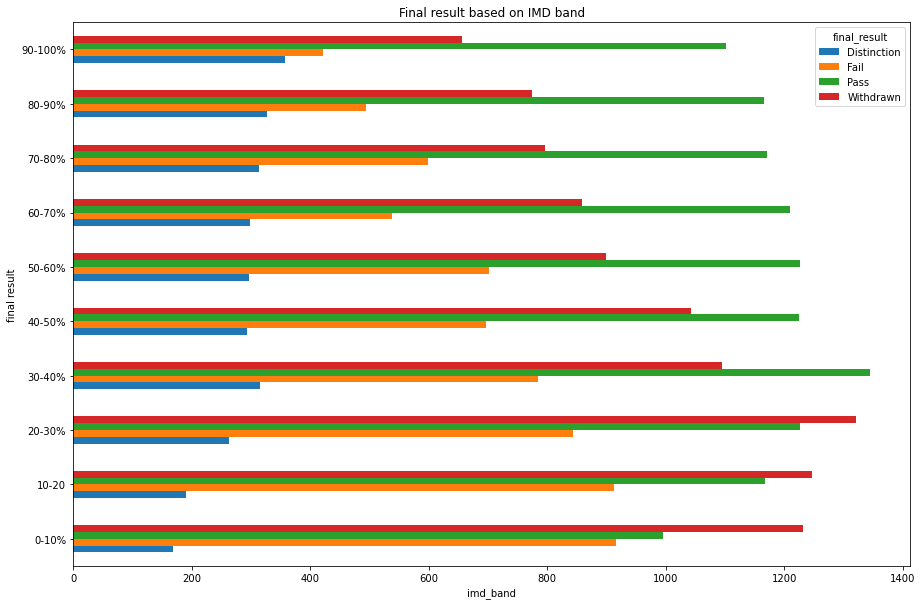

In [23]:
studentInfo.groupby(['imd_band','final_result']).size().unstack().plot(kind='barh',figsize=(15,10))
plt.xlabel('imd_band')
plt.ylabel('final result')
plt.title('Final result based on IMD band')
plt.show();

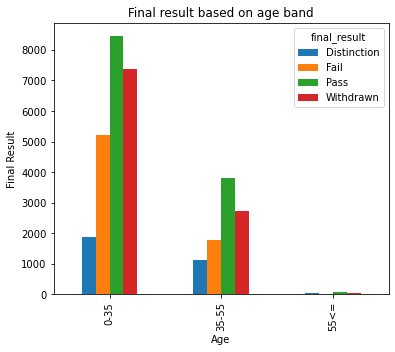

In [24]:
studentInfo.groupby(['age_band','final_result']).size().unstack().plot(kind='bar',figsize=(6,5))
plt.xlabel('Age')
plt.ylabel('Final Result')
plt.title('Final result based on age band')
plt.show();

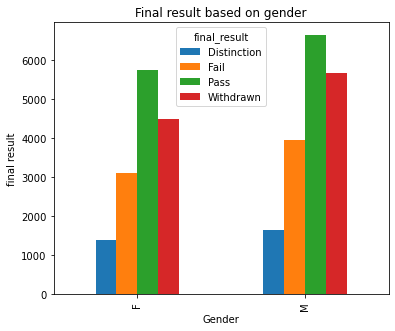

In [25]:
studentInfo.groupby(['gender','final_result']).size().unstack().plot(kind='bar',figsize=(6,5))
plt.xlabel('Gender')
plt.ylabel('final result')
plt.title('Final result based on gender')
plt.show();

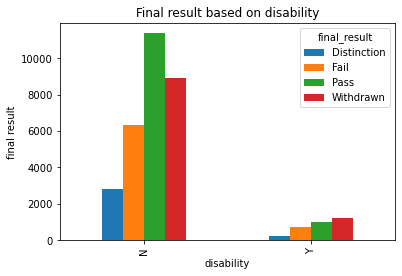

In [26]:
studentInfo.groupby(['disability','final_result']).size().unstack().plot(kind='bar')
plt.xlabel('disability')
plt.ylabel('final result')
plt.title('Final result based on disability')
plt.show()

Neste gráfico, fica claro que estudantes com deficiência tendem a desistir mais facilmente do curso. Estudantes com deficiência também possuem maior chance de reprovar nos testes, quando comparados a estudantes sem deficiência.

## Duração dos módulos

In [27]:
studentModuleLengths = studentInfo.merge(courses, on = ['code_module', 'code_presentation'], how='left')
studentModuleLengths = studentModuleLengths[['id_student', 'module_presentation_length']].groupby('id_student').median()
studentModuleLengths = studentModuleLengths.reset_index()

In [28]:
basics(studentModuleLengths)

Dataset sample:
   id_student  module_presentation_length
0        3733                       261.0
1        6516                       269.0
2        8462                       261.5
3       11391                       268.0
4       23629                       240.0
-------------
Lines, Columns:
(28785, 2)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  28785 non-null  int64  
 1   module_presentation_length  28785 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 449.9 KB
None
-------------
Summary statistics:
         id_student  module_presentation_length
count  2.878500e+04                28785.000000
mean   7.074447e+05                  255.990446
std    5.504403e+05                   12.843428
min    3.733000e+03                  234.000000
25% 

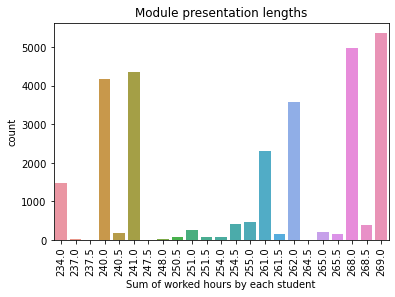

In [29]:
sns.countplot(studentModuleLengths.module_presentation_length)
plt.xticks(rotation = 90);
plt.xlabel('Sum of worked hours by each student')
plt.title("Module presentation lengths");

## Distribuição dos créditos estudados

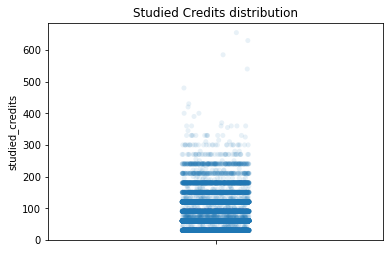

In [30]:
sns.stripplot(y = studentInfo['studied_credits'], alpha=0.1)
plt.title("Studied Credits distribution");

## Dias registrados

In [31]:
studentRegistration['unregistered'] = np.where(pd.isnull(studentRegistration['date_unregistration']), 0, 1)
studentRegistration['registered'] = np.where(pd.isnull(studentRegistration['date_registration']), 0, 1)
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,unregistered,registered
0,AAA,2013J,11391,-159.0,NaN,0,1
1,AAA,2013J,28400,-53.0,NaN,0,1
2,AAA,2013J,30268,-92.0,12.0,1,1
3,AAA,2013J,31604,-52.0,NaN,0,1
4,AAA,2013J,32885,-176.0,NaN,0,1


In [32]:
studentInterest = studentRegistration[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
studentInterest = studentInterest.reset_index()
basics(studentInterest)

Dataset sample:
   id_student  registered  unregistered
0        3733           1             1
1        6516           1             0
2        8462           2             2
3       11391           1             0
4       23629           1             0
-------------
Lines, Columns:
(28785, 3)
-------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id_student    28785 non-null  int64
 1   registered    28785 non-null  int32
 2   unregistered  28785 non-null  int32
dtypes: int32(2), int64(1)
memory usage: 449.9 KB
None
-------------
Summary statistics:
         id_student    registered  unregistered
count  2.878500e+04  28785.000000  28785.000000
mean   7.074447e+05      1.130728      0.349904
std    5.504403e+05      0.368991      0.549577
min    3.733000e+03      0.000000      0.000000
25%    5.081030e+05      1.000000      0.

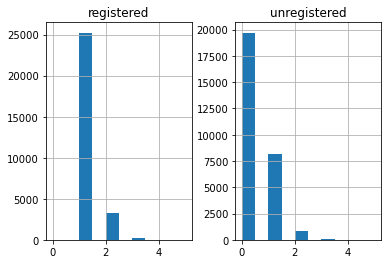

In [33]:
studentInterest[['registered', 'unregistered']].hist();

In [34]:
studentRegistration['register_days'] = (np.where(pd.isnull(studentRegistration['date_registration']), 
                                                    0, studentRegistration['date_registration'])).astype(int)
studentRegistration['unregister_days'] = (np.where(pd.isnull(studentRegistration['date_unregistration']), 
                                                    0, studentRegistration['date_unregistration'])).astype(int)
studentRegDays = studentRegistration[['id_student', 'register_days', 'unregister_days']].groupby(['id_student']).mean()
studentRegDays = studentRegDays.reset_index()
studentRegDays.head()

,id_student,register_days,unregister_days
0,3733,-68.0,-8.0
1,6516,-52.0,0.0
2,8462,-87.5,68.5
3,11391,-159.0,0.0
4,23629,-47.0,0.0


## Notas nas avaliações

In [35]:
studentAssessment['score'] = (np.where(pd.isnull(studentAssessment.score), 0, studentAssessment.score)).astype(int)
studentAssessment['assessment_mean'] = studentAssessment['score'].groupby(studentAssessment['id_assessment']).transform('mean')
studentAssessment['score_std'] = studentAssessment['score']/studentAssessment['assessment_mean']

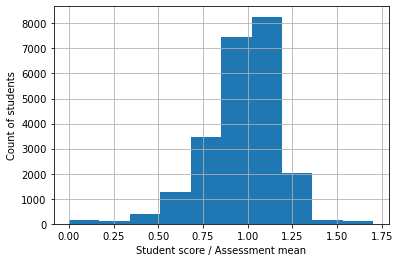

In [36]:
studentScoring = studentAssessment[['id_student', 'score_std']].groupby(['id_student']).mean()
studentScoring = studentScoring.reset_index()
studentScoring['score_std'].hist()
plt.ylabel('Count of students')
plt.xlabel('Student score / Assessment mean');

In [37]:
studentCourseAssessments = studentInfo.merge(studentAssessment, on = ['id_student'], how='left')

# set the index to be this and don't drop
studentCourseAssessments.set_index(keys=['code_module'], drop=False, inplace=True)

studentCourseAssessments['score'].fillna(0, inplace=True)

# get a list of names
names=studentCourseAssessments['code_module'].unique().tolist()
names

['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']

São sete cursos no total. Vamos analisar como é a distribuição de notas em cada curso. 

In [38]:
# now we can perform a lookup on a 'view' of the dataframe
aaa = studentCourseAssessments.loc[studentCourseAssessments.code_module=='AAA']
bbb = studentCourseAssessments.loc[studentCourseAssessments.code_module=='BBB']
ccc = studentCourseAssessments.loc[studentCourseAssessments.code_module=='CCC']
ddd = studentCourseAssessments.loc[studentCourseAssessments.code_module=='DDD']
eee = studentCourseAssessments.loc[studentCourseAssessments.code_module=='EEE']
fff = studentCourseAssessments.loc[studentCourseAssessments.code_module=='FFF']
ggg = studentCourseAssessments.loc[studentCourseAssessments.code_module=='GGG']
len(aaa) + len(bbb) + len(ccc) + len(ddd) + len (eee) + len(fff) + len(ggg)

213166

In [39]:
studentCourseAssessments.head()
studentCourseAssessments.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_mean', 'score_std'],
      dtype='object')

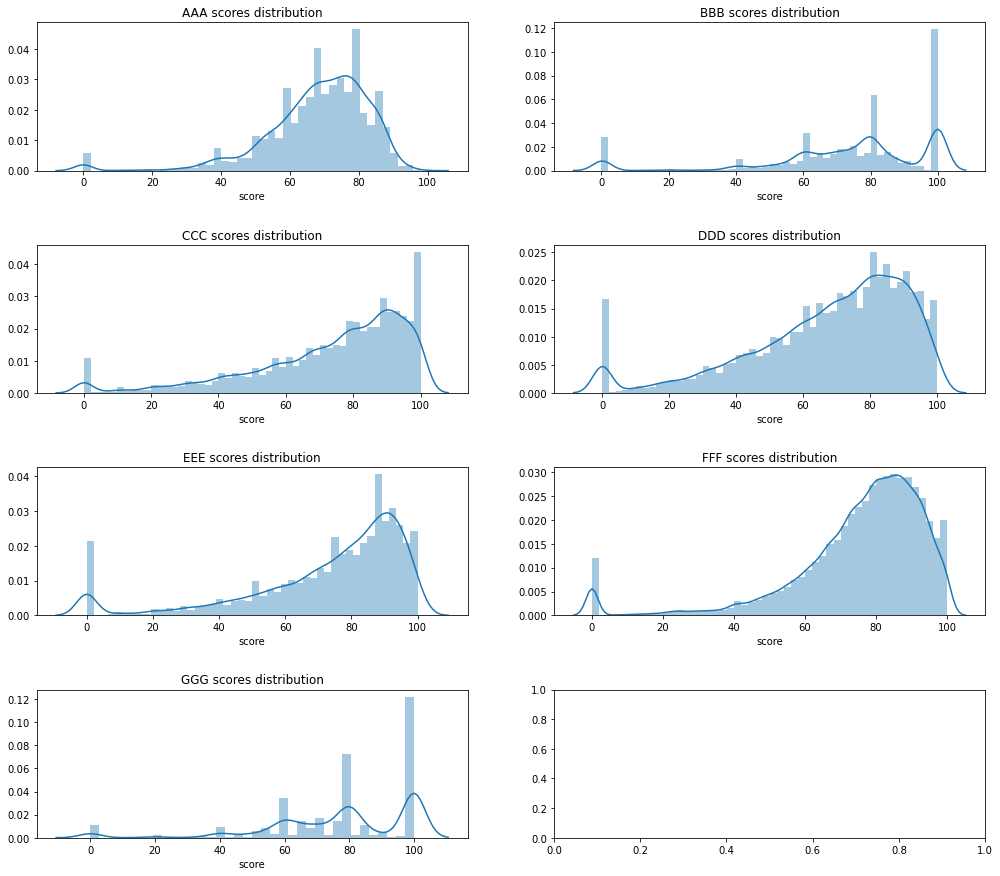

In [40]:
fig, ax = plt.subplots(4, 2, figsize=(17,15))
sns.distplot(aaa['score'], ax=ax[0,0])
sns.distplot(bbb['score'], ax=ax[0,1])
sns.distplot(ccc['score'], ax=ax[1,0])
sns.distplot(ddd['score'], ax=ax[1,1])
sns.distplot(eee['score'], ax=ax[2,0])
sns.distplot(fff['score'], ax=ax[2,1])
sns.distplot(ggg['score'], ax=ax[3,0])
ax[0,0].set_title('AAA scores distribution')
ax[0,1].set_title('BBB scores distribution')
ax[1,0].set_title('CCC scores distribution')
ax[1,1].set_title('DDD scores distribution')
ax[2,0].set_title('EEE scores distribution')
ax[2,1].set_title('FFF scores distribution')
ax[3,0].set_title('GGG scores distribution')
plt.subplots_adjust(hspace = 0.5)

In [41]:
studentVle2 = studentVle.merge(vle, on = 'id_site', how = 'left')

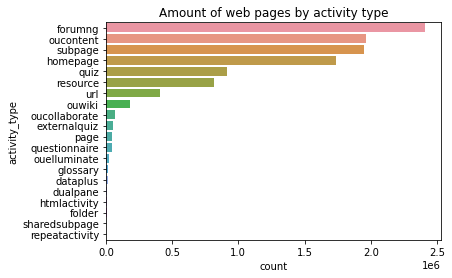

In [42]:
sns.countplot(y = studentVle2['activity_type'], 
              order = studentVle2['activity_type'].value_counts().index)
plt.title("Amount of web pages by activity type");

In [43]:
studentInteractivity = studentVle2[['id_student', 'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
studentInteractivity = studentInteractivity.reset_index()
studentInteractivity.head()

,id_student,activity_type,sum_click
0,6516,dataplus,5.250000
1,6516,forumng,2.577143
2,6516,homepage,3.145570
3,6516,oucontent,8.179348
4,6516,resource,1.631579


In [44]:
# pivoting will help us reduce multiple rows per student to one single row with multiple columns 
# After this we can visualize the columns with missing data

In [45]:
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_student      26074 non-null  int64  
 1   dataplus        26074 non-null  float64
 2   dualpane        26074 non-null  float64
 3   externalquiz    26074 non-null  float64
 4   folder          26074 non-null  float64
 5   forumng         26074 non-null  float64
 6   glossary        26074 non-null  float64
 7   homepage        26074 non-null  float64
 8   htmlactivity    26074 non-null  float64
 9   oucollaborate   26074 non-null  float64
 10  oucontent       26074 non-null  float64
 11  ouelluminate    26074 non-null  float64
 12  ouwiki          26074 non-null  float64
 13  page            26074 non-null  float64
 14  questionnaire   26074 non-null  float64
 15  quiz            26074 non-null  float64
 16  repeatactivity  26074 non-null  float64
 17  resource        26074 non-null 

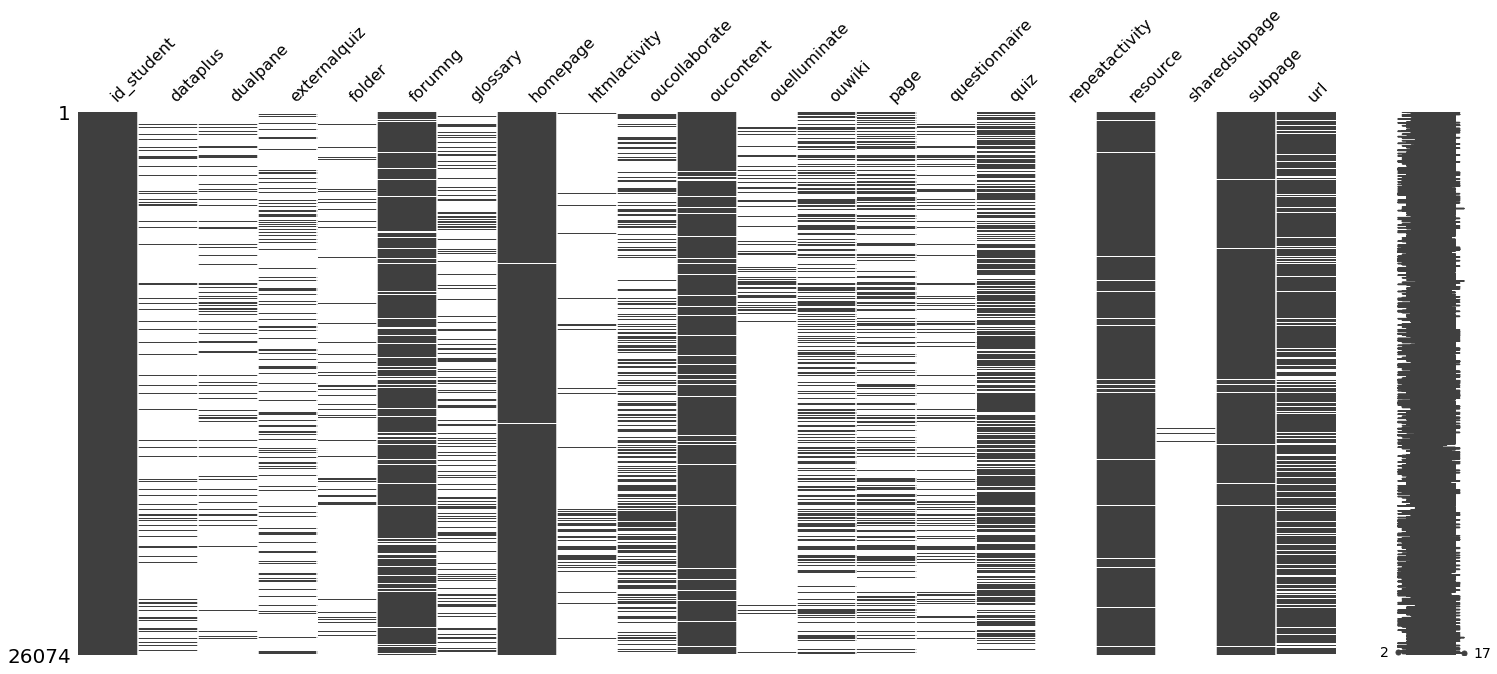

In [46]:
studentInteractivity = studentInteractivity.pivot(index='id_student', columns='activity_type', values='sum_click')
studentInteractivity = studentInteractivity.reset_index()
msno.matrix(studentInteractivity)
studentInteractivity = studentInteractivity.fillna(0)
studentInteractivity.info()

In [47]:
studentInteractivity2 = studentInteractivity[['id_student', 'forumng', 'homepage', 'oucollaborate',
       'oucontent', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'resource', 'subpage', 'url']]

In [48]:
studentInteractivity2.head()

activity_type,id_student,forumng,homepage,oucollaborate,oucontent,ouwiki,page,questionnaire,quiz,resource,subpage,url
0,6516,2.577143,3.145570,0.000,8.179348,0.0,0.0,0.0,0.000000,1.631579,1.958904,2.918367
1,8462,1.809524,3.603774,1.625,2.461538,3.6,0.0,0.0,0.000000,1.372549,1.991228,1.352941
2,11391,3.711538,3.450000,0.000,7.089744,0.0,0.0,0.0,0.000000,1.181818,2.909091,1.250000
3,23629,3.625000,2.250000,0.000,0.000000,0.0,0.0,0.0,2.066667,1.000000,2.500000,0.000000
4,23698,1.500000,1.753623,0.000,1.000000,0.0,1.0,0.0,7.578947,1.050000,1.441176,1.000000


Ideias de modelagem de dados para o time de Machine Learning:

1. Predição de desistência: Quais estudantes são mais prováveis de evadir do curso?
2. Predição de performance: Com base no histórico do aluno e nos cliques e acessos de páginas no VLE, podemos prever a performance dos estudantes?
